In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')


### **Each row is a different image representation in the form pixel data.**

In [4]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4,0,0,0,5,4,5,5,3,5,...,7.0,8.0,7.0,4.0,3.0,7.0,5.0,0.0,0.0,0.0
6,4,0,0,0,0,0,0,0,0,0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4,0,0,0,0,0,0,3,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8,0,0,0,0,0,0,0,0,0,...,203.0,214.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0,0,0,0,0,44,105,44,10,...,105.0,64.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6,0,0,0,0,0,0,0,1,0,...,174.0,136.0,155.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0
8,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,57.0,70.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


### **Transforming it to float32 to be acceptable by tensorflow and keras**

In [6]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype = 'float32')

In [7]:
train_data

array([[ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ..., 79.,  0.,  0.],
       [ 8.,  0.,  0., ..., nan, nan, nan]], dtype=float32)

In [8]:
test_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ..., nan, nan, nan]], dtype=float32)

### **Now slicing the dataframes separating X (image features) and y (image label)**

In [9]:
X_train = train_data[:,1:] # select all lines and all columns excluding the first one
y_train = train_data[:,0] # select only first column and all lines

In [10]:
X_test = test_data[:,1:]
y_test = test_data[:,0]

### **Normalize pixel values to the range [0,1]**

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.30980393, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ...,        nan,        nan,
               nan]], dtype=float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

### **Sample of images after resize of the data**

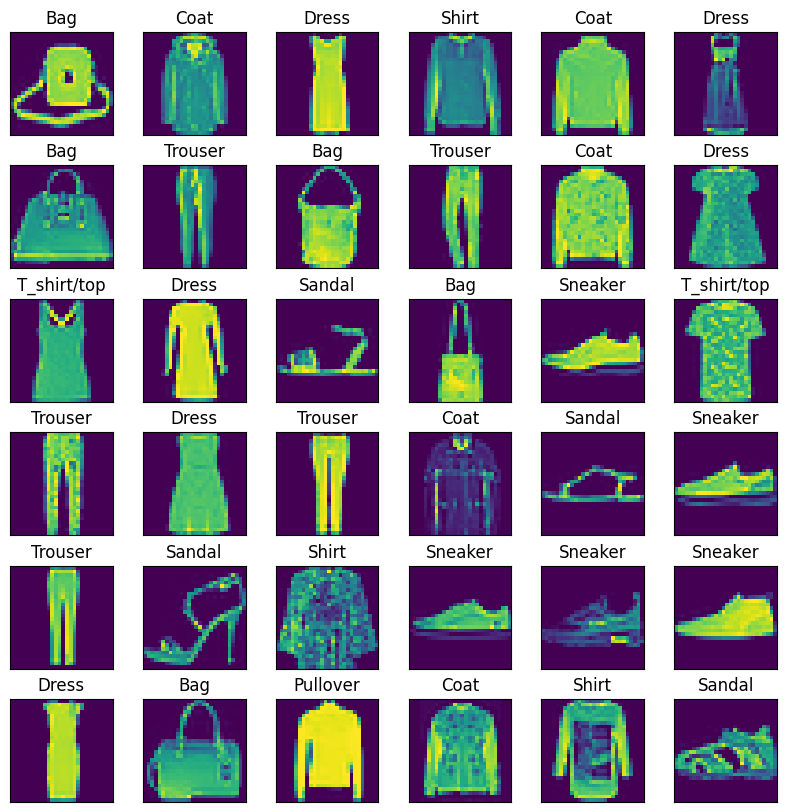

In [17]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1) # to hide the x and y ticks and make the display much cleaner
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28))) # reshaped back into 2d array
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.subplots_adjust(hspace=0.3)
plt.show()

### **Constructing Neural Network Architecture**